In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = np.array([[3, 2, 0, -1], [-1, 3, 0, 2], [0, -4, -2, 7]])
b = np.array([[3], [1], [-4]])

In [4]:
def gradient_descent(x0, α, γ, tol=1e-3, max_iters=10000):
    x = x0.copy()
    history = [(0, x.copy())]              
    for k in range(1, max_iters+1):
        g = df(x, γ)
        if np.linalg.norm(g) < tol:
            break
        x = x - α * g
        history.append((k, x.copy()))
    return history

def df(x, y):
    return A.T @ (A @ x - b) + y * x

In [5]:
a = 0.01
y = 2
x = np.array([[1], [1], [1], [1]])

In [6]:
h = gradient_descent(x, a, y)

# print first 5
print("First 5 iterates:")
for k, xk in h[:5]:
    print(f"k={k}, x={np.round(xk, 4)}")

# print last 5
print("\nLast 5 iterates:")
for k, xk in h[-5:]:
    print(f"k={k}, x={np.round(xk, 4)}")

print(f"\nConverged in {h[-1][0]} iterations; "
      f"‖∇f‖≈{np.linalg.norm(df(h[-1][1], y)):.4e}")

First 5 iterates:
k=0, x=[[1]
 [1]
 [1]
 [1]]
k=1, x=[[0.98]
 [1.07]
 [1.08]
 [0.58]]
k=2, x=[[0.9393]
 [1.0117]
 [1.0908]
 [0.4222]]
k=3, x=[[0.8973]
 [0.934 ]
 [1.0835]
 [0.3383]]
k=4, x=[[0.8586]
 [0.862 ]
 [1.0712]
 [0.2795]]

Last 5 iterates:
k=383, x=[[ 0.4302]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]
k=384, x=[[ 0.4302]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]
k=385, x=[[ 0.4302]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]
k=386, x=[[ 0.4302]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]
k=387, x=[[ 0.4301]
 [ 0.5845]
 [ 0.0479]
 [-0.217 ]]

Converged in 387 iterations; ‖∇f‖≈9.8030e-04


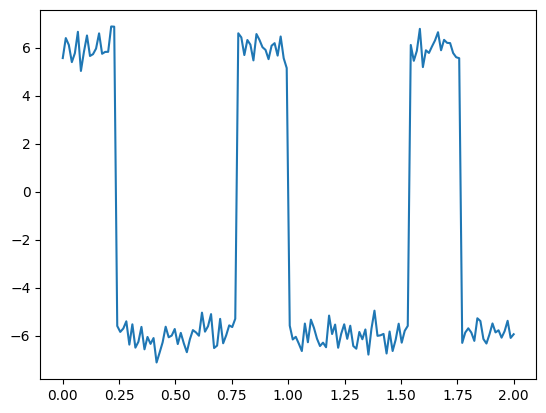

In [7]:
t_var = np.load("t_var.npy")
y_var = np.load("y_var.npy")
plt.plot(t_var, y_var)
plt.show()

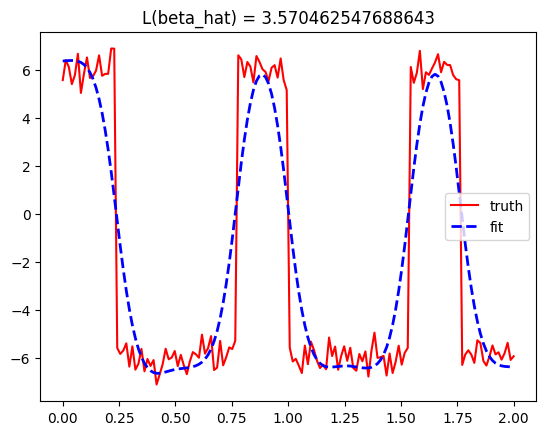

In [12]:
p = len(y_var)

def create_W(p):
    ## generate W which is a p-2 x p matrix as defined in the question
    W = np.zeros((p-2, p))
    b = np.array([1,-2,1])
    for i in range(p-2):
        W[i,i:i+3] = b
    return W

def loss(beta, y, W, lam):
    term1 = (1/(2*p)) * np.linalg.norm(y - beta)**2
    term2 = lam * np.linalg.norm(W @ beta)**2
    loss_val = term1 + term2
    return loss_val

lam = 0.9
W = create_W(p)
I = np.eye(p)

beta_hat = np.linalg.solve(I + 2*lam*p*(W.T @ W), y_var)

Lval = loss(beta_hat, y_var, W, lam)

plt.plot(t_var, y_var, zorder=1, color='red', label='truth')
plt.plot(t_var, beta_hat, zorder=3, color='blue',
linewidth=2, linestyle='--', label='fit')
plt.legend(loc='best')
plt.title(f"L(beta_hat) = {loss(beta_hat, y_var, W, lam)}")
plt.show()

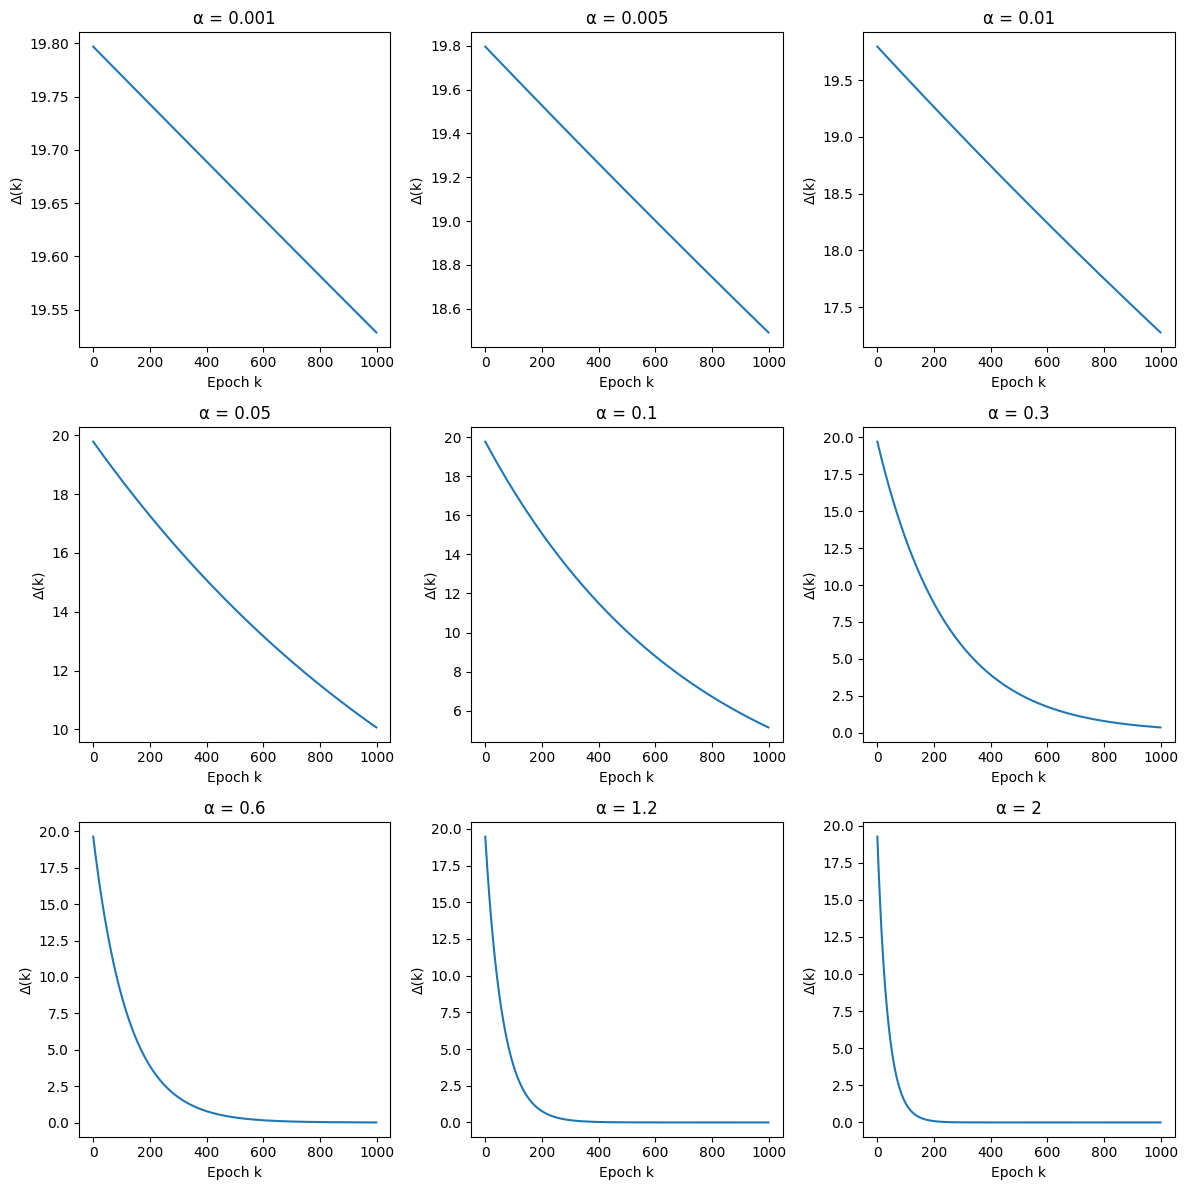

In [13]:
# Closed-form beta_hat with lambda=0.001
lam = 0.001
beta_hat = np.linalg.solve(np.eye(p) + 2*lam*p*(W.T @ W), y_var)

# Loss and gradient functions
def loss(beta):
    return 1/(2*p)*np.linalg.norm(y_var - beta)**2 + lam * np.linalg.norm(W @ beta)**2

def grad(beta):
    return (beta - y_var)/p + 2*lam*(W.T @ (W @ beta))

# Step sizes to test
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.6, 1.2, 2]

# Run batch GD for 1000 epochs, record Δ(k)
deltas = []
for alpha in alphas:
    beta = np.ones(p)
    delta_k = []
    for k in range(1, 1001):
        beta = beta - alpha * grad(beta)
        delta_k.append(loss(beta) - loss(beta_hat))
    deltas.append(delta_k)

# Plot in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for idx, ax in enumerate(axes.flatten()):
    ax.plot(deltas[idx])
    ax.set_title(f'α = {alphas[idx]}')
    ax.set_xlabel('Epoch k')
    ax.set_ylabel('Δ(k)')
plt.tight_layout()
plt.show()


based on the plots, alpha = 2 is the best.